In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [5]:
data = load_breast_cancer()
X = data.data
Y = data.target

# Convert to DataFrame for easier analysis (optional)
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = Y


print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [6]:
# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (455, 30)
Test data shape: (114, 30)


In [7]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1 - y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)

    def feed_forward(self, X):
        z = np.dot(X, self.weights) + self.bias
        A = self._sigmoid(z)
        return A

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            A = self.feed_forward(X)
            self.losses.append(self.compute_loss(y, A))
            dz = A - y
            dw = (1 / n_samples) * np.dot(X.T, dz)
            db = (1 / n_samples) * np.sum(dz)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_hat = self.feed_forward(X)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_hat]
        return np.array(y_predicted_cls)



In [8]:

model = MyLogisticRegression(learning_rate=0.0001, n_iters=1000)
# Train the model on the training data
model.fit(X_train, Y_train)


In [9]:
# Make predictions on the test set
Y_pred = model.predict(X_test)


print("Predictions:", Y_pred[:10])
print("True Labels:", Y_test[:10])


Predictions: [0 0 0 1 0 0 0 0 0 0]
True Labels: [1 0 0 1 1 0 0 0 1 1]


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.50
Precision: 1.00
Recall: 0.20
F1 Score: 0.33


In [16]:
#### Question 2

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions using the test set
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.50
Precision: 1.00
Recall: 0.20
F1 Score: 0.33


In [12]:
#### Question 3

In [13]:
from sklearn.metrics import precision_score, recall_score

def evaluate_hyperparameters(learning_rates, iterations_list, X_train, Y_train, X_test, Y_test):
    results = []
    for lr in learning_rates:
        for n_iters in iterations_list:
            # Train the model with specific hyperparameters
            model = MyLogisticRegression(learning_rate=lr, n_iters=n_iters)
            model.fit(X_train, Y_train)
            Y_pred = model.predict(X_test)

            # Evaluate precision and recall
            precision = precision_score(Y_test, Y_pred)
            recall = recall_score(Y_test, Y_pred)

            results.append({
                'learning_rate': lr,
                'iterations': n_iters,
                'precision': precision,
                'recall': recall
            })

    return pd.DataFrame(results)

learning_rates = [0.01, 0.001, 0.0001]
iterations_list = [500, 1000, 2000]

# Run the hyperparameter evaluation
results_df = evaluate_hyperparameters(learning_rates, iterations_list, X_train, Y_train, X_test, Y_test)


print(results_df)


/var/folders/9p/r4ylh6fx3gzgyq1j_bg39cy80000gn/T/ipykernel_40501/407967667.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/9p/r4ylh6fx3gzgyq1j_bg39cy80000gn/T/ipykernel_40501/407967667.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/9p/r4ylh6fx3gzgyq1j_bg39cy80000gn/T/ipykernel_40501/407967667.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/9p/r4ylh6fx3gzgyq1j_bg39cy80000gn/T/ipykernel_40501/407967667.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/9p/r4ylh6fx3gzgyq1j_bg39cy80000gn/T/ipykernel_40501/407967667.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/9p/r4ylh6fx3gzgyq1j_bg39cy80000gn/T/ipykernel_40501/407967667.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


   learning_rate  iterations  precision    recall
0         0.0100         500   0.985075  0.929577
1         0.0100        1000   1.000000  0.915493
2         0.0100        2000   0.985075  0.929577
3         0.0010         500   0.984848  0.915493
4         0.0010        1000   1.000000  0.915493
5         0.0010        2000   0.747368  1.000000
6         0.0001         500   0.957746  0.957746
7         0.0001        1000   1.000000  0.197183
8         0.0001        2000   0.957746  0.957746


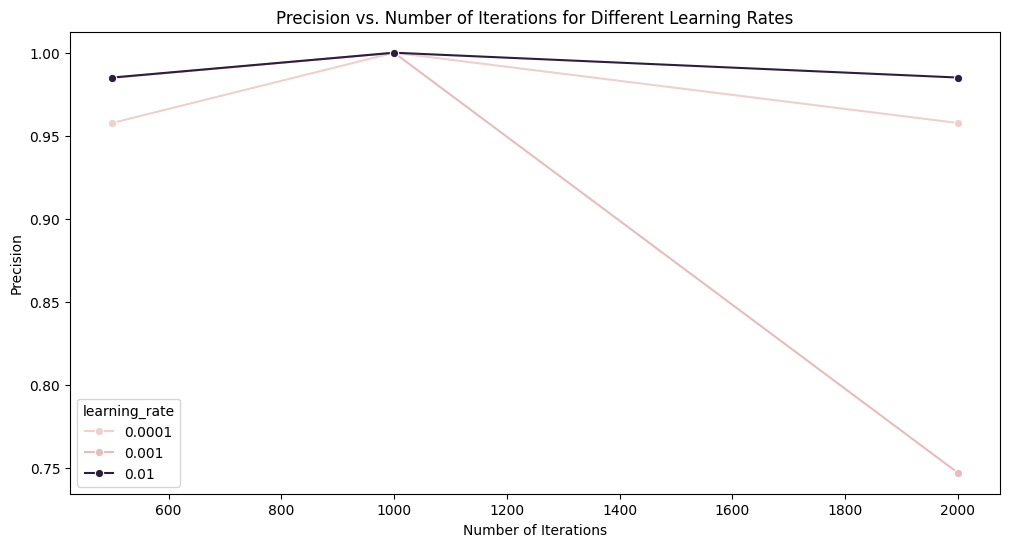

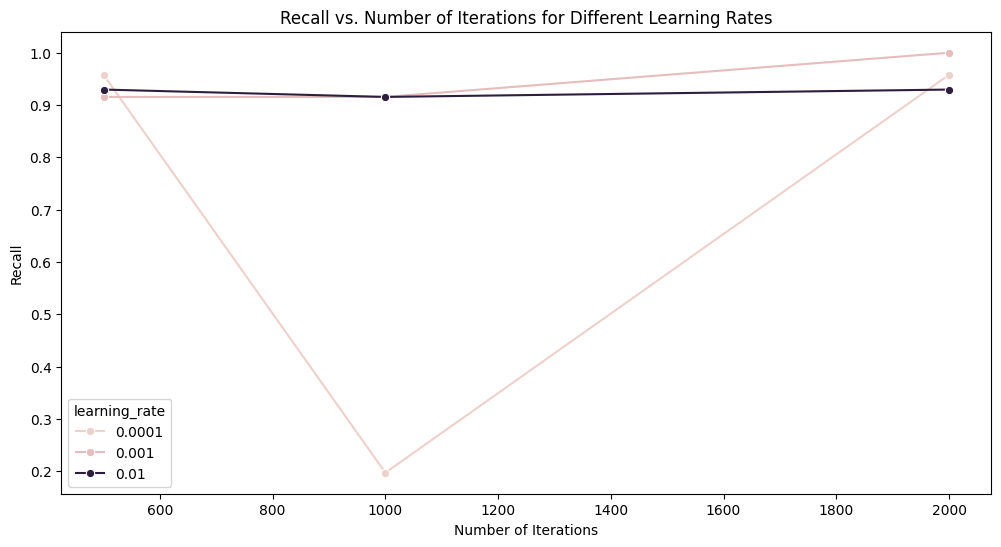

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='iterations', y='precision', hue='learning_rate', marker='o')
plt.title('Precision vs. Number of Iterations for Different Learning Rates')
plt.xlabel('Number of Iterations')
plt.ylabel('Precision')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='iterations', y='recall', hue='learning_rate', marker='o')
plt.title('Recall vs. Number of Iterations for Different Learning Rates')
plt.xlabel('Number of Iterations')
plt.ylabel('Recall')
plt.show()


In [18]:
###Question 4

In [19]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_probs = model.feed_forward(X_test)

thresholds = [0.3, 0.5, 0.7]

results = []

for threshold in thresholds:
    # Adjust predictions based on the threshold
    y_pred_adjusted = np.array([1 if prob >= threshold else 0 for prob in y_probs])

    # Calculate metrics
    accuracy = accuracy_score(Y_test, y_pred_adjusted)
    precision = precision_score(Y_test, y_pred_adjusted)
    recall = recall_score(Y_test, y_pred_adjusted)
    f1 = f1_score(Y_test, y_pred_adjusted)

    results.append({
        'threshold': threshold,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

   threshold  accuracy  precision    recall  f1_score
0        0.3  0.535088        1.0  0.253521  0.404494
1        0.5  0.500000        1.0  0.197183  0.329412
2        0.7  0.456140        1.0  0.126761  0.225000


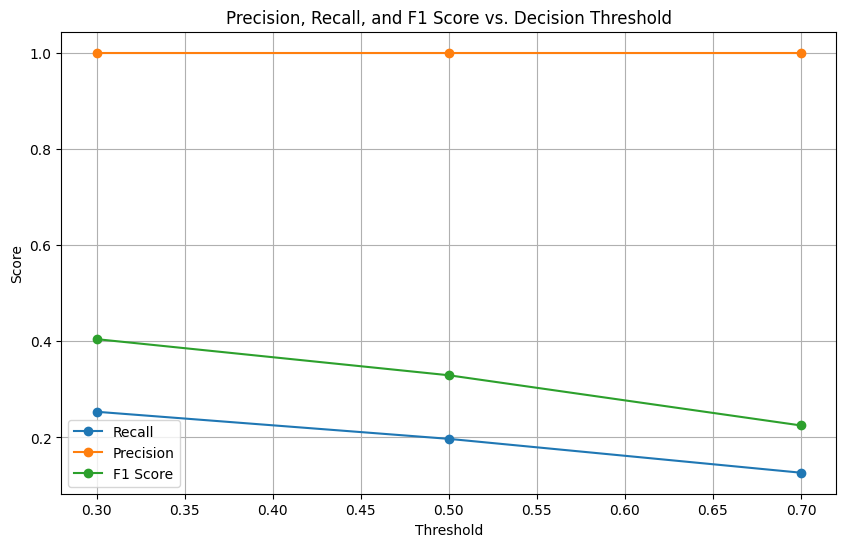

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot recall vs. threshold
plt.plot(results_df['threshold'], results_df['recall'], label='Recall', marker='o')
# Plot precision vs. threshold
plt.plot(results_df['threshold'], results_df['precision'], label='Precision', marker='o')
# Plot F1 Score vs. threshold
plt.plot(results_df['threshold'], results_df['f1_score'], label='F1 Score', marker='o')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Decision Threshold')
plt.legend()
plt.grid(True)
plt.show()
